# Lab 3_Supervised Learning

## Prerequisite 
linear regression

target    = cases_recoverd

feature   = date, vaccination, case_new, case_active, case_unvax, case_fvax

KNN regression

target    = cases_recovered

feature   = date, vaccination, case_new, case_active, case_unvax, case_fvax

In [1]:
# Read csv from URL 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


# Set display options to ensure all data is printed
pd.set_option('display.max_rows', None)
url = "https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv"

# Read data from second URL
url2 = "https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/vaccination/vax_malaysia.csv"


# Filter out data of cases_new, case active, case_unvax, case_fvax, case_recovered according to date (From 1st Sept 2021 to 31th Mac 2021) 
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df = df[(df['date'] >= '2021-09-01') & (df['date'] <= '2022-03-31')]
df = df[['date', 'cases_new', 'cases_active', 'cases_unvax', 'cases_fvax', 'cases_recovered']]


# Read and filter data from the second URL
df2 = pd.read_csv(url2)
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2[(df2['date'] >= '2021-09-01') & (df2['date'] <= '2022-03-31')]
df2 = df2[['date', 'daily']]

# Merge the two DataFrames on the date column
df_final = pd.merge(df2, df, on='date')

print(df_final.to_string(index=False))

      date  daily  cases_new  cases_active  cases_unvax  cases_fvax  cases_recovered
2021-09-01 431749      18762        265279         8299        5487            21073
2021-09-02 405408      20988        262545         9557        6263            23473
2021-09-03 359964      19378        259194         8598        6015            22399
2021-09-04 336857      19057        256307         8308        6213            21582
2021-09-05 317247      20396        255794         8852        6875            20573
2021-09-06 343995      17352        252673         7306        5969            20201
2021-09-07 352471      18547        252007         8142        6134            18902
2021-09-08 352293      19733        248678         8191        7017            22701
2021-09-09 353959      19307        242808         8020        6930            24855
2021-09-10 318262      21176        242167         8437        7964            21476
2021-09-11 287032      19550        239354         8187        72

## Linear Regression

Test Loss: 0.3101214809419057


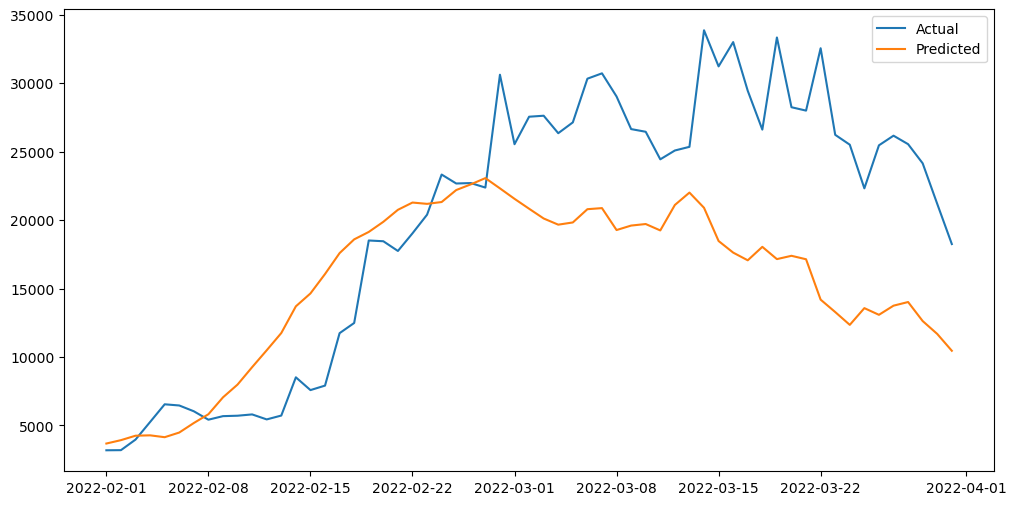

In [22]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = df_final[(df_final['date'] >= '2021-09-01') & (df_final['date'] <= '2022-01-31')]
test_data = df_final[(df_final['date'] >= '2022-02-01') & (df_final['date'] <= '2022-03-31')]

X_train = train_data[['daily', 'cases_new', 'cases_active', 'cases_unvax', 'cases_fvax']]
y_train = train_data['cases_recovered']

X_test = test_data[['daily', 'cases_new', 'cases_active', 'cases_unvax', 'cases_fvax']]
y_test = test_data['cases_recovered']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Using sklearn linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
test_loss = model.score(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)

# TensorFlow model

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, input_shape=(5,))
# ])


# model.compile(optimizer='adam', loss='mse')

# history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# # Evaluate the model
# test_loss = model.evaluate(X_test, y_test)
# print(f'Test Loss: {test_loss}')

# # Make predictions
# predictions = model.predict(X_test)

# Plot the predictions and the actual values in date domain
plt.figure(figsize=(12, 6))
plt.plot(test_data['date'], y_test, label='Actual')
plt.plot(test_data['date'], predictions, label='Predicted')
plt.legend()
plt.show()
